# Reto - Titanic: Machine Learning from Disaster

---

#### Lautaro Gabriel Coteja - A01571214

#### Daniela Jiménez Téllez - A01654798

#### Andrés Villarreal González - A00833915

#### Héctor Hibran Tapia Fernández - A01661114

---

Link del repositorio:

https://github.com/Lautaro000/Inteligencia-Artificial-Avanzada-para-la-Ciencia-de-Datos-I

--- 
### Importación de librerías

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

plt.style.use("dark_background")

### Importación de datos

#### Recordamos que se descompone de la siguiente forma el dataset:

- train: Contiene las 12 columnas del dataset, solo tenemos del pasajero 1 al 891.
- test: Contiene 11 columnas del dataset, se quitó "Survived", tenemos del pasajero 892 al 1309.
- gender_submission: Contiene la columna "Survived" del test, con los mismos pasarejos, se usará como comparación de respuesta al finalizar el modelo.

| Variable  | Definición                              | Clave                                                  |
|-----------|-----------------------------------------|--------------------------------------------------------|
| survival  | Supervivencia                           | 0 = No, 1 = Sí                                         |
| pclass    | Clase de ticket                         | 1 = 1ª, 2 = 2ª, 3 = 3ª                                 |
| sex       | Sexo                                    |                                                        |
| Age       | Edad en años                            |                                                        |
| sibsp     | Nº de hermanos / cónyuges a bordo       |                                                        |
| parch     | Nº de padres / hijos a bordo            |                                                        |
| ticket    | Número de ticket                        |                                                        |
| fare      | Tarifa del pasajero                     |                                                        |
| cabin     | Número de camarote                      |                                                        |
| embarked  | Puerto de embarque                      | C = Cherburgo, Q = Queenstown, S = Southampton         |

**Notas sobre las variables:**
- **pclass:** Un indicador de estatus socioeconómico (SES)
  - 1ª = Alta
  - 2ª = Media
  - 3ª = Baja
- **edad:** La edad es fraccionaria si es menor de 1. Si la edad es estimada, se presenta en la forma xx.5
- **sibsp:** El conjunto de datos define las relaciones familiares de la siguiente manera:
  - Hermano/a = hermano, hermana, hermanastro/a
  - Cónyuge = esposo, esposa (se ignoran amantes y prometidos)
- **parch:** El conjunto de datos define las relaciones familiares de la siguiente manera:
  - Padre/madre = madre, padre
  - Hijo/a = hija, hijo, hijastra/o
  - Algunos niños viajaban solo con una niñera, por lo que parch=0 para ellos.

### Datos de entrenamiento (train.csv)

In [2]:
df = pd.read_csv("/Users/danyj/OneDrive/Documents/Séptimo Semestre/Reto/train.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Procesamientos de Datos

---

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

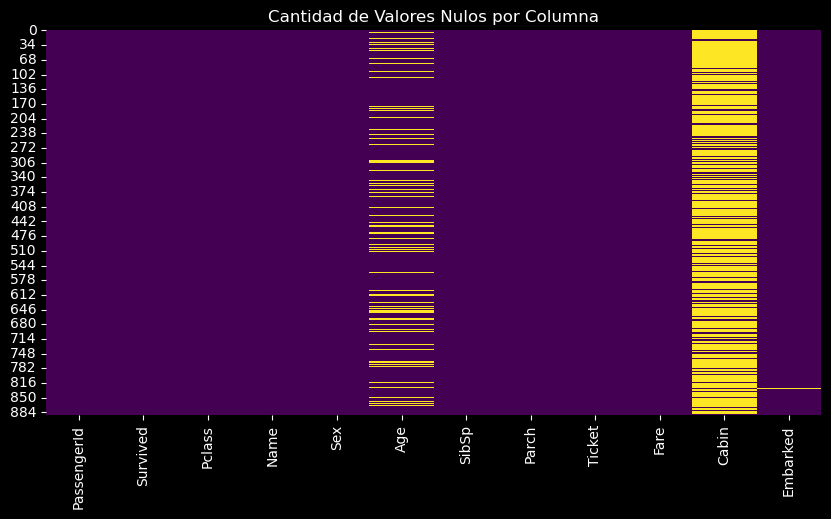

In [6]:
plt.figure(figsize = (10, 5))
plt.title("Cantidad de Valores Nulos por Columna")
sns.heatmap(df.isnull(), cbar = False, cmap = "viridis")  
plt.show()

### Haciendo experimentos...

Hay 3 variables con valores nulos: "Embarked", "Age" y "Cabin". Se hará un análisis de cada una para elegir la mejor manera de rellenar los datos.

#### **Embarked** 

Dado que la variable solo cuenta con 2 NaNs, y se refiere a la puerta de embarque por donde ingresó cada pasajero, se rellenará con la moda.

In [7]:
# Relleno con la moda de la variable "Embarked"

df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

#### **Age**

Esta columna cuenta con 177 valores nulos, por lo que utilizará interpolación lineal para rellenarlos. En este caso, lo primero que se hará es separar el dataset por el título que tiene cada pasajero y se almacenará en una nueva variable llamada "Title".

In [8]:
# Separando las personas por título

df["Title"] = df["Name"].apply(lambda x: x.split(",")[1].split(".")[0].strip())

In [9]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [10]:
df.value_counts("Title")

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Sir               1
Ms                1
Capt              1
Mme               1
Lady              1
Jonkheer          1
Don               1
the Countess      1
Name: count, dtype: int64

Analizando el dataset con la columna extra llamada "Title", decidimos que vamos a separar el dataframe en 5 sub-dataframes para así poder interpolar dentro de los mismos rangos de edad de cada título. Estos serán los siguientes:

* **Mr:** Se refiere a los pasajeros adultos de sexo masculino.
* **Miss:** Se refiere a las pasajeras jóvenes de sexo femenino.
* **Mrs:** Se refiere a las pasajeras adultas de sexo femenino.
* **Master:** Se refiere a los pasajeros que aún son niños.
* **Extra:** Son diferentes títulos que tienen algunos de los pasajeros abordo. Dado que son una pequeña parte de todo el dataset, se juntarán para así no tener que crear diferentes datasets para cada uno de los títulos contenidos en este.

In [11]:
# DataFrame "Mr"

df_mr = df[df["Title"] == "Mr"]

# Interpolación

df_mr.loc[:, "Age"] = df_mr["Age"].interpolate(method = "linear")

In [12]:
df_mr

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,44.5,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S,Mr
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S,Mr
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,Mr
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [13]:
# DataFrame "Miss"

df_miss = df[df["Title"] == "Miss"]

# Interpolación

df_miss.loc[:, "Age"] = df_miss["Age"].interpolate(method = "linear")

In [14]:
df_miss

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Miss
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Miss
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,Miss
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C,Miss
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C,Miss
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,Miss
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss


In [15]:
# DataFrame "Mrs"

df_mrs = df[df["Title"] == "Mrs"]

# Interpolación

df_mrs.loc[:, "Age"] = df_mrs["Age"].interpolate(method = "linear")

In [16]:
df_mrs

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,Mrs
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C,Mrs
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,Mrs
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S,Mrs


In [17]:
# DataFrame "Master"

df_master = df[df["Title"] == "Master"]

# Interpolación

df_master.loc[:, "Age"] = df_master["Age"].interpolate(method = "linear")

In [18]:
df_master

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000,3,1,349909,21.0750,NaN,S,Master
16,17,0,3,"Rice, Master. Eugene",male,2.000,4,1,382652,29.1250,NaN,Q,Master
50,51,0,3,"Panula, Master. Juha Niilo",male,7.000,4,1,3101295,39.6875,NaN,S,Master
59,60,0,3,"Goodwin, Master. William Frederick",male,11.000,5,2,CA 2144,46.9000,NaN,S,Master
63,64,0,3,"Skoog, Master. Harald",male,4.000,3,2,347088,27.9000,NaN,S,Master
65,66,1,3,"Moubarek, Master. Gerios",male,2.415,1,1,2661,15.2458,NaN,C,Master
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.830,0,2,248738,29.0000,NaN,S,Master
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.000,1,0,2651,11.2417,NaN,C,Master
159,160,0,3,"Sage, Master. Thomas Henry",male,6.500,8,2,CA. 2343,69.5500,NaN,S,Master
164,165,0,3,"Panula, Master. Eino Viljami",male,1.000,4,1,3101295,39.6875,NaN,S,Master


In [19]:
# DataFrame de todo lo demás

df_extra = df[~df["Title"].isin(["Mr", "Miss", "Mrs", "Master"])]

# Parchar el único NaN con la media de las personas con el título Dr

mean_age_dr = df_extra[df_extra["Title"] == "Dr"]["Age"].mean()

df_extra.loc[(df["Title"] == "Dr") & (df["Age"].isnull()), "Age"] = mean_age_dr

In [20]:
# Juntamos todos los DataFrames

df_list = [df_mr, df_miss, df_mrs, df_master, df_extra]
df = pd.concat(df_list, ignore_index = True)

In [21]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
2,6,0,3,"Moran, Mr. James",male,44.5,0,0,330877,8.4583,NaN,Q,Mr
3,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
4,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,767,0,1,"Brewe, Dr. Arthur Jackson",male,42.0,0,0,112379,39.6000,NaN,C,Dr
887,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,Dr
888,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S,Jonkheer
889,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.0000,NaN,S,Rev


Como se puede observar, ahora cada uno de los valores faltantes fue rellenado con un valor que entra del mismo rango de edad que los demás pasajeros con el mismo título.

#### **Cabin**

La variable de "Cabin" es un poco engañosa ya que de 891 pasajeros, 687 no cuentan con un valor asignado. Esta variable se refiere al número de cuarto / camarote con el que contaba cada pasajero. Igualmente, investigando un poco, se encontró que el Titanic estaba dividido de la siguiente manera:

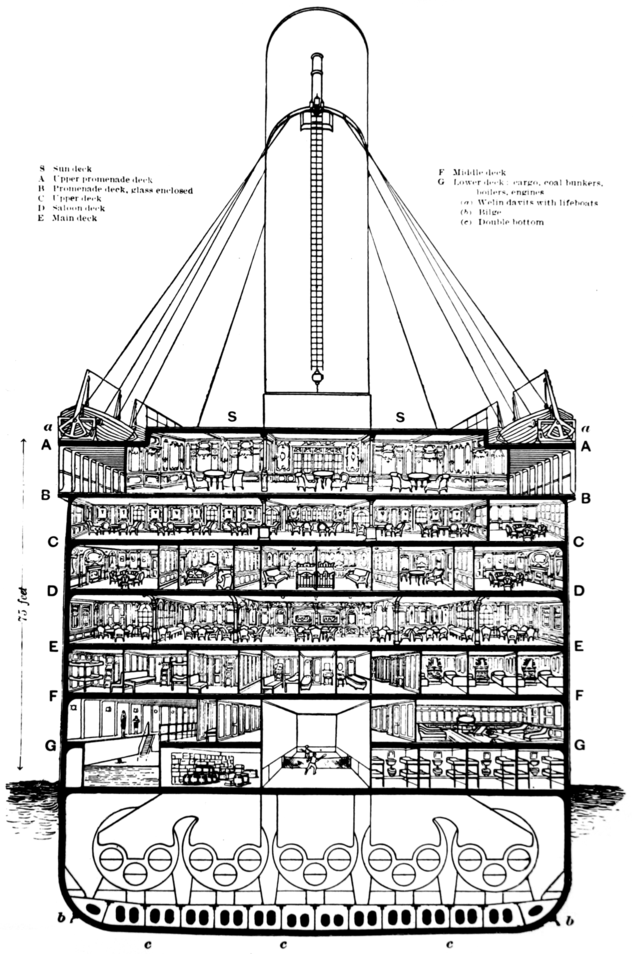

Revisando esto, podemos observar que la manera en la que los datos se muestran es que se tiene la letra de su sección más el número de habitación con la que contaban (e.g. E46). Igualmente, parte de la investigación mostró que la manera en la que las secciones estaban dividas es la siguiente:

* **Primera clase**: "La primera clase se extendía desde el puente superior hasta el puente E. Aunque la mayoría de los puentes se compartían con las otras clases, el puente A era una excepción, ya que únicamente incluía instalaciones de primera clase. En los otros puentes, la primera clase ocupaba el centro, la segunda estaba ligeramente por detrás y la tercera, así como la tripulación, ocupaban la proa y la popa de la nave."

* **Segunda clase:** "La mayor parte de los camarotes de pasajeros de segunda clase se ubicaron en la parte trasera del barco, entre las cubiertas D y F. Además, la mayoría de los camarotes de la cubierta E fueron designados para la segunda clase."

* **Tercera clase:** "Los pasajeros eran distribuidos en cabinas privadas con capacidad máxima para 10 personas. Había 84 cabinas de dos literas para alojar a los pasajeros, y en total se podían acomodar 1.100 inmigrantes en todos los camarotes de tercera clase. Las cabinas de tercera clase estaba ubicadas en las áreas menos deseables del navío, donde los pasajeros estaban sujetos al ruido y las vibraciones de los motores de la sala de máquinas (ubicada en las cubiertas inferiores, como la G)."

Habiendo dicho esto, se decidió que por el momento es mejor eliminar la variable "Cabin" del DataFrame ya que esta información nos la puede proporcionar otras variables como lo son "Pclass" o incluso "Ticket" y "Fare". Sin embargo, si es necesario para algún análisis posterior, se modificará el dataset para incluirlo nuevamente y hacer una investigación más profunda para decidir la mejor manera de rellenar los datos faltantes.

***Fuentes:***

*https://es.wikipedia.org/wiki/Instalaciones_de_primera_clase_del_RMS_Titanic*
*https://es.wikipedia.org/wiki/Instalaciones_de_segunda_y_tercera_clase_del_RMS_Titanic*

In [22]:
df = df.drop("Cabin", axis = 1)

In [23]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
2,6,0,3,"Moran, Mr. James",male,44.5,0,0,330877,8.4583,Q,Mr
3,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,Mr
4,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,767,0,1,"Brewe, Dr. Arthur Jackson",male,42.0,0,0,112379,39.6000,C,Dr
887,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,S,Dr
888,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,S,Jonkheer
889,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.0000,S,Rev


### Guardar el dataset limpio

In [24]:
ruta = "/Users/danyj/OneDrive/Documents/Séptimo Semestre/Reto/train_limpio.csv" 
df.to_csv(ruta, index = False)

In [25]:
df_clean = pd.read_csv("/Users/danyj/OneDrive/Documents/Séptimo Semestre/Reto/train_limpio.csv")

In [26]:
df_clean.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

Ahora que ya no tenemos datos faltantes podemos continuar con el análisis de datos.

## Análisis de Datos

---

In [27]:
df_clean.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3,17
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S,Mr
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,646,517
mean,446.000000,0.383838,2.308642,NaN,NaN,29.807054,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.883697,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.125000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [28]:
fig = px.histogram(df_clean, x = "Survived", color = "Sex", barmode = "group", text_auto = True,
                   color_discrete_map = { "male": "#00FFFF", "female": "#FF69B4" })

fig.update_xaxes(tickvals = [ 0, 1 ], ticktext = [ "No sobrevivió", "Sobrevivió" ], title_text = "")

fig.update_traces(textposition = "outside", textfont_color = "white")

fig.update_layout(
    title_text = "Sobrevivientes por sexo",
    title_x = 0.5,
    plot_bgcolor = "black",
    paper_bgcolor = "black",
    font_color = "white",
    xaxis = dict(
        color = "white"
    ),
    yaxis = dict(
        color = "white"
    ),
    legend = dict(
        font = dict(
            color = "white"
        )
    )
)

In [29]:
fig = px.histogram(
    df_clean,
    x = "Fare",
    color = "Survived",
    marginal = "box",
    nbins = 50,
    title = "Distribución de las tarifas de supervivencia",
    color_discrete_map = { 0: "#ff073a", 1: "#39ff14" },
    category_orders = { "Survived": [ 0, 1 ] }
)

fig.for_each_trace(lambda t: t.update(name = t.name.replace("0", "No sobrevivió").replace("1", "Sobrevivió")))

fig.update_layout(
    title_x = 0.5,
    plot_bgcolor = "black",
    paper_bgcolor = "black",
    font_color = "white",
    title_font = dict(color = "white"),
    legend_bgcolor = "black",
    legend_font = dict(color = "white")
)

fig.show()


In [30]:
fig = px.histogram(
    df_clean,
    x = "Age",
    color = "Survived",
    marginal = "box",
    nbins = 50,
    title = "Distribución de edad",
    color_discrete_map = { 0: "#ff073a", 1: "#39ff14" },
    category_orders = { "Survived": [ 0, 1 ] }
)

fig.for_each_trace(lambda t: t.update(name = t.name.replace("0", "No Sobrevivió").replace("1", "Sobrevivió")))

fig.update_layout(
    title_x = 0.5,
    plot_bgcolor = "black",
    paper_bgcolor = "black",
    font_color = "white",
    title_font = dict(color = "white"),
    legend_bgcolor = "black",
    legend_font = dict(color = "white")
)

fig.show()

In [31]:
pclass_counts = df_clean[ "Pclass" ].value_counts().sort_index()

fig = go.Figure(data = [ go.Bar(
    x = pclass_counts.index,
    y = pclass_counts.values,
    text = pclass_counts.values,
    textposition = "outside",
    marker_color = [ "#FFD700", "#C0C0C0", "#CD7F32" ],
    marker_line_color = [ "#FFD700", "#C0C0C0", "#CD7F32" ],
    marker_line_width = 2
)])

fig.update_traces(
    textposition = "outside",
    textfont = dict(size = 14),
    cliponaxis = False,
    offsetgroup = 0
)

fig.update_traces(y = [ v + 20 for v in pclass_counts.values ])

fig.update_layout(
    title = "Número de personas por clase",
    xaxis_title = " ",
    yaxis_title = "Conteo",
    xaxis = dict(
        tickmode = "array",
        tickvals = [ 1, 2, 3 ],
        ticktext = [ "1ra Clase", "2da Clase", "3ra Clase" ],
        linecolor = "gray",
        gridcolor = "black"
    ),
    yaxis = dict(
        range = [ 0, 520 ],
        linecolor = "gray",
        gridcolor = "gray"
    ),
    bargap = 0.2,
    width = 700,
    height = 500,
    plot_bgcolor = "black",
    paper_bgcolor = "black",
    font = dict(color = "white"),
    title_font = dict(color = "white")
)

fig.show()

In [32]:
fig = px.histogram(df_clean, x = "Pclass", color = "Sex", barmode = "group", text_auto = True,
                   title = "Número de mujeres y hombres por clase",
                   color_discrete_map = { "male": "#00FFFF", "female": "#FF69B4" })

fig.update_xaxes(title_text = " ", tickvals = [ 1, 2, 3 ], ticktext = [ "1ra Clase", "2da Clase", "3ra Clase" ])

fig.update_traces(textposition = "outside", textfont_color = "white")

fig.update_layout(
    width = 1000,
    height = 500,
    plot_bgcolor = "black",
    paper_bgcolor = "black",
    font_color = "white",
    xaxis = dict(
        color = "white"
    ),
    yaxis = dict(
        color = "white"
    ),
    legend = dict(
        font = dict(
            color = "white"
        )
    )
)

fig.show()

In [33]:
df_count = df_clean.groupby([ "Survived", "Pclass" ]).size().reset_index(name = "count")

fig = go.Figure()

pclass_names = { 1: "1ra Clase", 2: "2da Clase", 3: "3ra Clase" }
survival_labels = { 0: "No Sobrevivió", 1: "Sobrevivió" }

for pclass in sorted(df_clean[ "Pclass" ].unique()):
    filtered_df = df_count[df_count[ "Pclass" ] == pclass].copy()  # Crear una copia explícita
    filtered_df[ "Survived" ] = filtered_df[ "Survived" ].map(survival_labels)

    fig.add_trace(go.Bar(
        x = filtered_df[ "Survived" ],
        y = filtered_df[ "count" ],
        name = pclass_names[pclass],
        text = filtered_df[ "count" ],
        textposition = "outside",
        marker_color = [ "#FFD700", "#C0C0C0", "#CD7F32" ][pclass-1],
        marker_line_color = [ "#FFD700", "#C0C0C0", "#CD7F32" ][pclass-1],
        marker_line_width = 2
    ))

fig.update_layout(
    title_text = "Supervivientes por clase",
    xaxis_title = " ",
    barmode = "group",
    plot_bgcolor = "black",
    paper_bgcolor = "black",
    font = dict(color = "white"),
    title_font = dict(color = "white")
)

fig.show()

In [34]:
neon_colors = [
    "#39FF14", "#0AFF0A", "#00FFFF", "#00BFFF", "#FF00FF", "#FF1493",
    "#FF4500", "#FFD700", "#ADFF2F", "#7FFF00", "#00FF7F", "#32CD32",
    "#00FA9A", "#00CED1", "#1E90FF", "#8A2BE2", "#FF69B4"
]

average_age_per_title = df_clean.groupby("Title")["Age"].mean().dropna()
average_age_per_title = average_age_per_title.sort_values(ascending = True)

fig = go.Figure()

for i, (title, age) in enumerate(average_age_per_title.items()):
    fig.add_trace(go.Bar(
        y = [ title ],
        x = [ age ],
        orientation = "h",
        name = title,
        marker = dict(color = neon_colors[i % len(neon_colors)]),
        text = f"{age:.2f}",
        textposition = "inside"
    ))

fig.update_layout(
    template = "plotly_dark",
    plot_bgcolor = "#000000",
    paper_bgcolor = "#000000",
    font = dict(color = "white"),
    title = "Edad promedio por título",
    xaxis = dict(title = "Edad"),
    yaxis = dict(title = "Título"),
    height = 550
)

fig.show()

Al hacer estas gráficas podemos entender la relación de las variables entre ellas, además de poder ver los datos se manera gráfica. Habiendo dicho esto, procederemos a sacar variables para poder pasar a la parte de modelado.

### Selección de variables

In [35]:
df_clean

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
2,6,0,3,"Moran, Mr. James",male,44.5,0,0,330877,8.4583,Q,Mr
3,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,Mr
4,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,767,0,1,"Brewe, Dr. Arthur Jackson",male,42.0,0,0,112379,39.6000,C,Dr
887,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,S,Dr
888,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,S,Jonkheer
889,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.0000,S,Rev


Empezaremos por sacar variables que no nos proporcionan información relevante para la predicción de supervivencia, como lo son el nombre, número de ticket, ID, etcétera.

In [36]:
df_clean = df_clean.drop(["PassengerId", "Name", "Ticket", "Title"], axis = 1)

In [37]:
df_clean

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,0,3,male,35.0,0,0,8.0500,S
2,0,3,male,44.5,0,0,8.4583,Q
3,0,1,male,54.0,0,0,51.8625,S
4,0,3,male,20.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,1,male,42.0,0,0,39.6000,C
887,1,1,female,49.0,0,0,25.9292,S
888,0,1,male,38.0,0,0,0.0000,S
889,0,2,male,28.0,0,1,33.0000,S


Posteriormente manejaremos algunas variables para poder observar mejor la correlación entre ellas.

Empezaremos con la variable "Embarked", la cual separaremos entre sus 3 tipos de entradas (C, Q, S). Crearemos una columna de 1's y 0's de cada puerto, la cual nos dirá si alguien entró en el correspondiente de cada columna o no. Esto es con el propósito de ver si el lugar de entrada influyó en la supervivencia.

Al mismo tiempo, realizaremos el mismo procedimiento para la variable "Sex", la cual dividiremos en 2 columnas (Male y Female).

In [38]:
from sklearn.preprocessing import OneHotEncoder

In [39]:
def transform_dataframe(df):
    encoder = OneHotEncoder(sparse_output = False, handle_unknown = "ignore")

    matrix = encoder.fit_transform(df[["Embarked"]])
    column_names = [ "C", "Q", "S" ]

    for i in range(len(matrix.T)):
        df[column_names[i]] = matrix.T[i]

    matrix = encoder.fit_transform(df[["Sex"]])
    column_names = [ "Female", "Male" ]

    for i in range(len(matrix.T)):
        df[column_names[i]] = matrix.T[i]

    return df

In [40]:
df_clean = transform_dataframe(df_clean)

# Quitaremos la variables "Embarked" y "Sex", ya que no nos proporcionan más información

df_clean = df_clean.drop(["Embarked", "Sex"], axis = 1)

In [41]:
df_clean

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,Female,Male
0,0,3,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,0,3,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
2,0,3,44.5,0,0,8.4583,0.0,1.0,0.0,0.0,1.0
3,0,1,54.0,0,0,51.8625,0.0,0.0,1.0,0.0,1.0
4,0,3,20.0,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,42.0,0,0,39.6000,1.0,0.0,0.0,0.0,1.0
887,1,1,49.0,0,0,25.9292,0.0,0.0,1.0,1.0,0.0
888,0,1,38.0,0,0,0.0000,0.0,0.0,1.0,0.0,1.0
889,0,2,28.0,0,1,33.0000,0.0,0.0,1.0,0.0,1.0


Con estas variables haremos una matriz de correlación para observar qué tan relacionadas están las variables, y así poder ver si existe la posibilidad de reducir la dimensionalidad del DataFrame o demás.

### Matriz de correlación

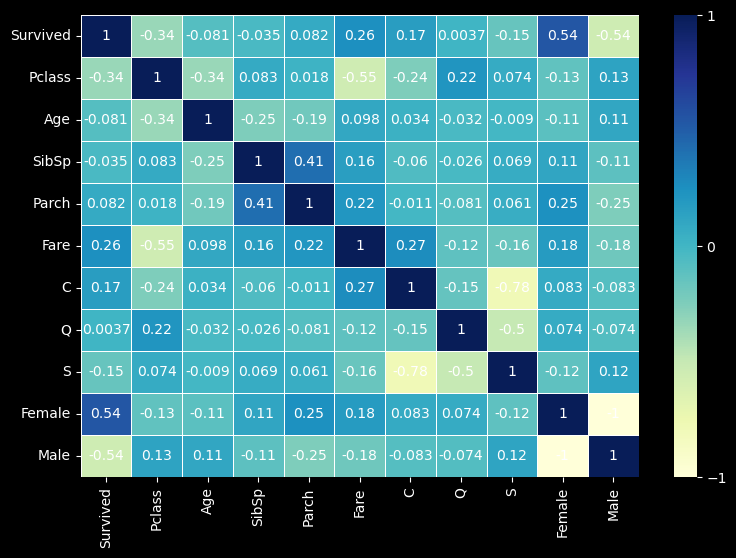

In [42]:
df_numeric = df_clean.select_dtypes(include = [ "number" ])
corr = df_numeric.corr()

plt.figure(figsize = (9, 6))

sns.heatmap(corr, annot = True, cmap = "YlGnBu", annot_kws = { "color": "white" },
            cbar_kws = { "ticks": [ -1, 0, 1 ], "orientation": "vertical" },
            linewidths = 0.5, linecolor = "white")

plt.show()

De estos resultados podemos observar que hay una correlación alta entre las variables "SibSp" y "Parch", las cuales hacer referencia a lo siguiente:

* **SibSp:** Se refiere a la cantidad de hermanos o esposos abordo que tenía cada pasajero.
* **Parch:** Se refiere a la cantidad de padres o hijos abordo que tenía cada pasajero.

Analizando, creemos que hay una relación fuerte en estas variables, por lo que las podríamos juntar para crear una nueva variable llamada "Family", la cual nos dirá la cantidad total de familiares abordo con los que contaba cada pasajero, y así poder reducir la dimensión del dataset.

In [45]:
df_clean["Family"] = df_clean["SibSp"] + df_clean["Parch"]

# Quitamos las variables "SibSp" y "Parch" ya que no nos proporcionan más información

df_clean = df_clean.drop(["SibSp", "Parch"], axis = 1)

In [47]:
df_clean

,Survived,Pclass,Age,Fare,C,Q,S,Female,Male,Family
0,0,3,22.0,7.2500,0.0,0.0,1.0,0.0,1.0,1
1,0,3,35.0,8.0500,0.0,0.0,1.0,0.0,1.0,0
2,0,3,44.5,8.4583,0.0,1.0,0.0,0.0,1.0,0
3,0,1,54.0,51.8625,0.0,0.0,1.0,0.0,1.0,0
4,0,3,20.0,8.0500,0.0,0.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,1,42.0,39.6000,1.0,0.0,0.0,0.0,1.0,0
887,1,1,49.0,25.9292,0.0,0.0,1.0,1.0,0.0,0
888,0,1,38.0,0.0000,0.0,0.0,1.0,0.0,1.0,0
889,0,2,28.0,33.0000,0.0,0.0,1.0,0.0,1.0,1


Ahora que tenemos el DataFrame filtrado, podemos empezar a hacer pruebas de modelado, para ver qué modificaciones podríamos hacer.

## Modelos Predictivos

---

Para probar los modelos predictivos utilizaremos el dataset "Test.csv" como datos de prueba. Aplicaremos el mismo proceso de filtrado para así poderlos probar.

### Importación de datos

In [48]:
df_test = pd.read_csv("/Users/danyj/OneDrive/Documents/Séptimo Semestre/Reto/train.csv")

In [49]:
df_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Regresión Logística